In [2]:
import pandas as pd
import numpy as np
import pickle
from scipy import stats 
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from pydataset import data
import warnings
import sidetable
warnings.filterwarnings('ignore')
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from geopy.geocoders import Nominatim

plt.rcParams["figure.figsize"] = (10,8)

pd.options.display.max_columns = None

In [3]:
df = pd.read_csv('../project-da-promo-d-module-2-team-1/data/encuesta_analistas.csv', index_col=0)
df.sample()

,edad,genero,pais,formacion,ocupacion,lenguajes_programacion,lenguajes_recomendados,IDE,plataforma_computacion,visualizacion,sector,tamaño_empresa,equipo,actividades,salario,productos_big_data,herramienta_data_analytics,notebooks,plataformas_nube,uso_plataformas,formacion_data,fuentes_online
467,25-29,Woman,India,Master’s degree,Data Analyst,"Python, R, SQL",SQL,Jupyter Notebook,A laptop,"Matplotlib ,Seaborn",Retail/Sales,50-249 employees,5-9,"Analyze and understand data to influence product or business decisions, Build and/or r...","1,000-1,999",NaN,"Business intelligence software (Salesforce, Tableau, Spotfire, etc.)",Other,Amazon Web Services (AWS),Microsoft Azure Virtual Machines,University Courses (resulting in a university degree),"Kaggle (notebooks, forums, etc), YouTube (Kaggle YouTube, Cloud AI Adventures, etc)"


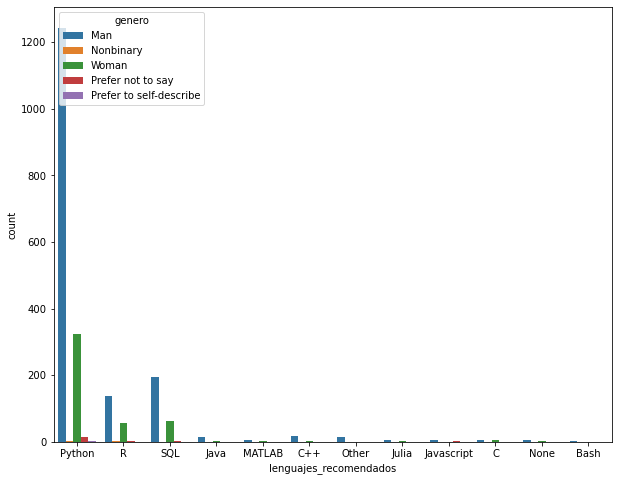

In [4]:
sns.countplot(x=df["lenguajes_recomendados"], hue = df["genero"]);

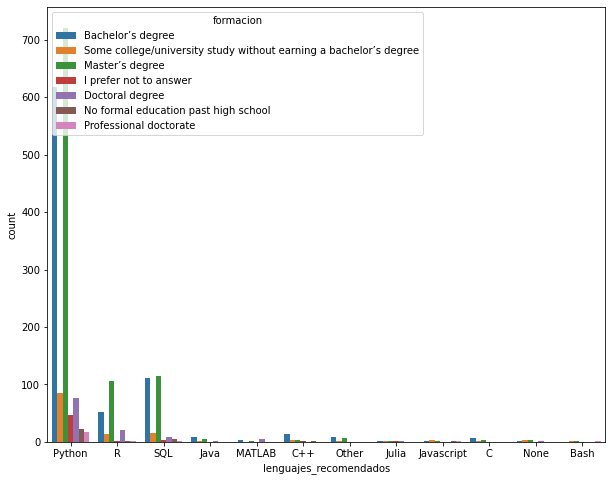

In [5]:
sns.countplot(x=df["lenguajes_recomendados"], hue = df["formacion"]);

In [6]:
df_activities = df["actividades"].str.split(",").apply(pd.Series)

In [7]:
df_activities

,0,1,2,3,4,5,6,7
16,Analyze and understand data to influence product or business decisions,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,Analyze and understand data to influence product or business decisions,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,Analyze and understand data to influence product or business decisions,Build and/or run the data infrastructure that my business uses for storing,analyzing,and operationalizing data,Build prototypes to explore applying machine learning to new areas,Build and/or run a machine learning service that operationally improves my product or...,NaN,NaN
52,Analyze and understand data to influence product or business decisions,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
25954,Analyze and understand data to influence product or business decisions,Do research that advances the state of the art of machine learning,NaN,NaN,NaN,NaN,NaN,NaN
25959,Analyze and understand data to influence product or business decisions,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25965,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25966,Experimentation and iteration to improve existing ML models,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df_conteo_actividades = pd.concat([df_activities[0].value_counts(), df_activities[1].value_counts(),df_activities[2].value_counts(),df_activities[3].value_counts(),df_activities[4].value_counts(),df_activities[5].value_counts(),df_activities[6].value_counts(),df_activities[7].value_counts()], axis=1)

In [9]:
df_conteo_actividades.fillna(0, inplace=True)

In [10]:
df_conteo_actividades["total"] = df_conteo_actividades[0]+ df_conteo_actividades[1]+df_conteo_actividades[2]+df_conteo_actividades[3]+df_conteo_actividades[4]+ df_conteo_actividades[5]+df_conteo_actividades[6]+df_conteo_actividades[7]

In [11]:
df_conteo_actividades

,0,1,2,3,4,5,6,7,total
Analyze and understand data to influence product or business decisions,1653.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1653.0
None of these activities are an important part of my role at work,168.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,168.0
Build and/or run the data infrastructure that my business uses for storing,88.0,600.0,0.0,0.0,0.0,0.0,0.0,0.0,688.0
Other,63.0,13.0,1.0,1.0,4.0,2.0,1.0,0.0,85.0
Build prototypes to explore applying machine learning to new areas,45.0,129.0,0.0,16.0,215.0,0.0,0.0,0.0,405.0
Build and/or run a machine learning service that operationally improves my product or workflows,25.0,58.0,38.0,9.0,53.0,123.0,0.0,0.0,306.0
Do research that advances the state of the art of machine learning,19.0,42.0,37.0,18.0,26.0,27.0,23.0,56.0,248.0
Experimentation and iteration to improve existing ML models,13.0,66.0,39.0,16.0,26.0,40.0,90.0,0.0,290.0
analyzing,0.0,88.0,600.0,0.0,0.0,0.0,0.0,0.0,688.0
and operationalizing data,0.0,0.0,88.0,600.0,0.0,0.0,0.0,0.0,688.0


In [12]:
df_conteo_actividades.reset_index(inplace = True)
nueva_columna = {"index": "actividades"}
df_conteo_actividades.rename(columns = nueva_columna, inplace = True)

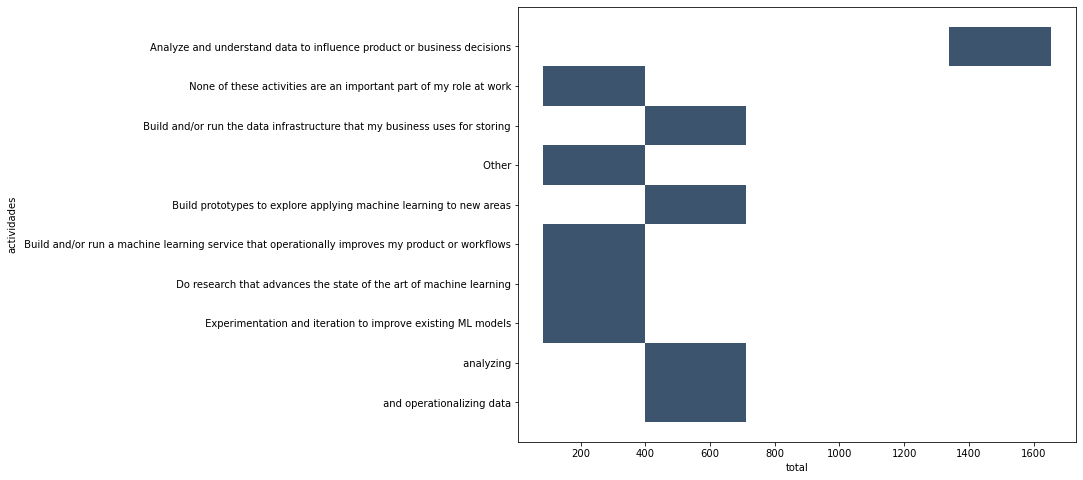

In [13]:
sns.histplot(y = df_conteo_actividades["actividades"], x=df_conteo_actividades["total"]);

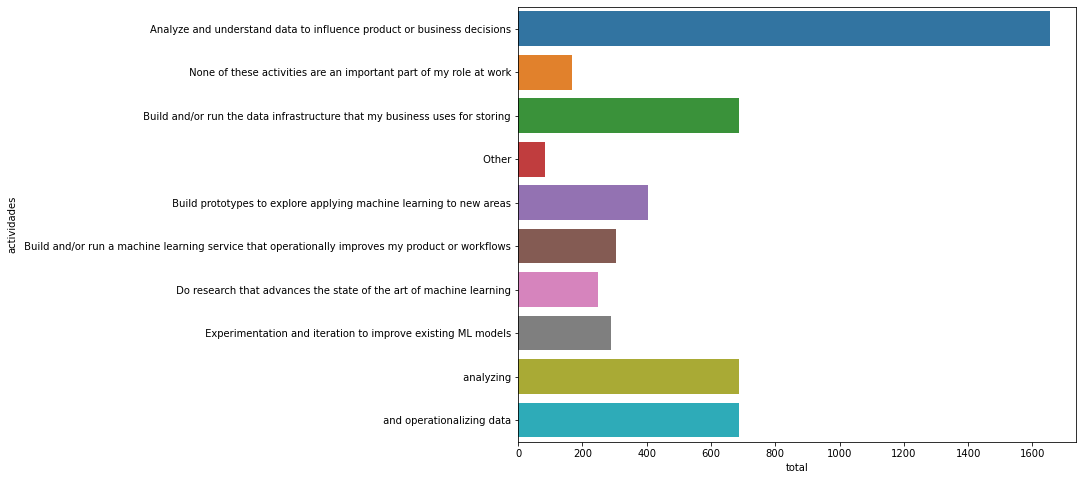

In [14]:
sns.barplot(y = df_conteo_actividades["actividades"], x = df_conteo_actividades["total"]);

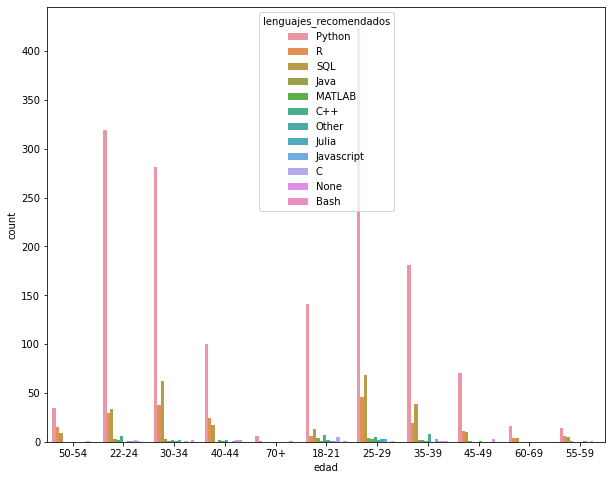

In [15]:
sns.countplot(x = df["edad"], hue = df["lenguajes_recomendados"]);

In [16]:
df.dtypes

edad                          object
genero                        object
pais                          object
formacion                     object
ocupacion                     object
lenguajes_programacion        object
lenguajes_recomendados        object
IDE                           object
plataforma_computacion        object
visualizacion                 object
sector                        object
tamaño_empresa                object
equipo                        object
actividades                   object
salario                       object
productos_big_data            object
herramienta_data_analytics    object
notebooks                     object
plataformas_nube              object
uso_plataformas               object
formacion_data                object
fuentes_online                object
dtype: object

In [17]:
df.describe(include='all').T

,count,unique,top,freq
edad,2301,11,25-29,588
genero,2301,5,Man,1759
pais,2301,65,India,564
formacion,2301,7,Master’s degree,1027
ocupacion,2301,1,Data Analyst,2301
lenguajes_programacion,2158,213,"Python, SQL",466
lenguajes_recomendados,2157,12,Python,1587
IDE,2155,408,Jupyter Notebook,268
plataforma_computacion,2148,6,A laptop,1507
visualizacion,2108,191,"Matplotlib ,Seaborn",445


In [18]:
df.stb.missing()

,missing,total,percent
productos_big_data,1694,2301,73.620165
uso_plataformas,1563,2301,67.926988
plataformas_nube,1024,2301,44.502390
fuentes_online,541,2301,23.511517
herramienta_data_analytics,533,2301,23.163842
formacion_data,482,2301,20.947414
salario,262,2301,11.386354
actividades,227,2301,9.865276
visualizacion,193,2301,8.387658
plataforma_computacion,153,2301,6.649283


In [19]:
(df["lenguajes_programacion"].str.split(",").apply(pd.Series)).describe(include="all").T

,count,unique,top,freq
0,2158,11,Python,1804
1,1648,10,SQL,833
2,868,10,SQL,436
3,341,9,Javascript,66
4,154,7,Java,41
5,64,6,Javascript,27
6,31,5,MATLAB,10
7,11,4,MATLAB,4
8,5,3,Swift,3
9,3,1,Bash,3


In [20]:
df_lp = df["lenguajes_programacion"].str.split(",").apply(pd.Series)


In [21]:
df_lp.head()

,0,1,2,3,4,5,6,7,8,9,10,11
16,Python,SQL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,Python,SQL,C,C++,Java,Javascript,MATLAB,NaN,NaN,NaN,NaN,NaN
52,R,SQL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
df_lp.stb.missing()

,missing,total,percent
11,2300,2301,99.956541
9,2298,2301,99.869622
10,2298,2301,99.869622
8,2296,2301,99.782703
7,2290,2301,99.521947
6,2270,2301,98.652760
5,2237,2301,97.218601
4,2147,2301,93.307258
3,1960,2301,85.180356
2,1433,2301,62.277271


In [23]:
df["lenguajes_programacion"].value_counts()

Python, SQL                                466
Python                                     315
Python, R, SQL                             259
Python, R                                   97
 SQL                                        78
                                          ... 
Python, R, Javascript, MATLAB                1
Python, R, SQL, Julia                        1
Python, R, Javascript, Bash                  1
Python, C, C++, Java, Other                  1
Python, R, SQL, Java, Javascript, Other      1
Name: lenguajes_programacion, Length: 213, dtype: int64

In [24]:
df_lp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2301 entries, 16 to 25968
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       2158 non-null   object
 1   1       1648 non-null   object
 2   2       868 non-null    object
 3   3       341 non-null    object
 4   4       154 non-null    object
 5   5       64 non-null     object
 6   6       31 non-null     object
 7   7       11 non-null     object
 8   8       5 non-null      object
 9   9       3 non-null      object
 10  10      3 non-null      object
 11  11      1 non-null      object
dtypes: object(12)
memory usage: 298.2+ KB


In [25]:
for col in df_lp.columns:
    print(df_lp[col].value_counts())
    print("---------------")

Python         1804
 R              132
 SQL            130
 None            32
 Other           26
 C               13
 C++              7
 Javascript       5
 MATLAB           4
 Java             4
 Swift            1
Name: 0, dtype: int64
---------------
 SQL           833
 R             583
 Other          54
 C              40
 C++            39
 Java           34
 Javascript     30
 MATLAB         26
 Bash            7
 Julia           2
Name: 1, dtype: int64
---------------
 SQL           436
 C              76
 Other          67
 C++            66
 Java           64
 Javascript     63
 MATLAB         51
 Bash           40
 Julia           4
 Swift           1
Name: 2, dtype: int64
---------------
 Javascript    66
 C++           64
 Java          56
 MATLAB        46
 C             42
 Other         33
 Bash          29
 Julia          4
 Swift          1
Name: 3, dtype: int64
---------------
 Java          41
 C++           29
 Javascript    28
 Other         23
 MATLAB       

In [26]:
df_conteo_lenguajes = pd.concat([df_lp[0].value_counts(), df_lp[1].value_counts(),df_lp[2].value_counts(),df_lp[3].value_counts(),df_lp[4].value_counts(),df_lp[5].value_counts(),df_lp[6].value_counts(),df_lp[7].value_counts(),df_lp[8].value_counts(),df_lp[9].value_counts(),df_lp[10].value_counts(),df_lp[11].value_counts() ], axis=1)

In [27]:
df_conteo_lenguajes.fillna(0, inplace=True)

In [28]:
df_conteo_lenguajes["total"] = df_conteo_lenguajes[0]+ df_conteo_lenguajes[1]+df_conteo_lenguajes[2]+df_conteo_lenguajes[3]+df_conteo_lenguajes[4]+ df_conteo_lenguajes[5]+df_conteo_lenguajes[6]+df_conteo_lenguajes[7]+df_conteo_lenguajes[8]+ df_conteo_lenguajes[9]+df_conteo_lenguajes[10]+df_conteo_lenguajes[11]

In [29]:
df_conteo_lenguajes

,0,1,2,3,4,5,6,7,8,9,10,11,total
Python,1804.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1804.0
R,132.0,583.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,715.0
SQL,130.0,833.0,436.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1399.0
None,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.0
Other,26.0,54.0,67.0,33.0,23.0,6.0,1.0,1.0,1.0,0.0,0.0,1.0,213.0
C,13.0,40.0,76.0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,171.0
C++,7.0,39.0,66.0,64.0,29.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,205.0
Javascript,5.0,30.0,63.0,66.0,28.0,27.0,10.0,0.0,0.0,0.0,0.0,0.0,229.0
MATLAB,4.0,26.0,51.0,46.0,21.0,11.0,10.0,4.0,1.0,0.0,3.0,0.0,177.0
Java,4.0,34.0,64.0,56.0,41.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,214.0


In [30]:
df_conteo_lenguajes.reset_index(inplace=True)

In [31]:
nueva_columna = {"index": "lenguajes"}
df_conteo_lenguajes.rename(columns = nueva_columna, inplace = True)

In [32]:
df_conteo_lenguajes

,lenguajes,0,1,2,3,4,5,6,7,8,9,10,11,total
0,Python,1804.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1804.0
1,R,132.0,583.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,715.0
2,SQL,130.0,833.0,436.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1399.0
3,None,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.0
4,Other,26.0,54.0,67.0,33.0,23.0,6.0,1.0,1.0,1.0,0.0,0.0,1.0,213.0
5,C,13.0,40.0,76.0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,171.0
6,C++,7.0,39.0,66.0,64.0,29.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,205.0
7,Javascript,5.0,30.0,63.0,66.0,28.0,27.0,10.0,0.0,0.0,0.0,0.0,0.0,229.0
8,MATLAB,4.0,26.0,51.0,46.0,21.0,11.0,10.0,4.0,1.0,0.0,3.0,0.0,177.0
9,Java,4.0,34.0,64.0,56.0,41.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,214.0


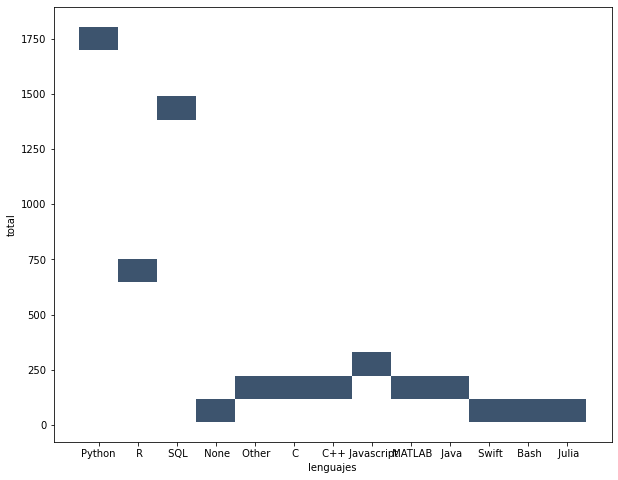

In [33]:
sns.histplot(x = df_conteo_lenguajes["lenguajes"], y = df_conteo_lenguajes["total"]);

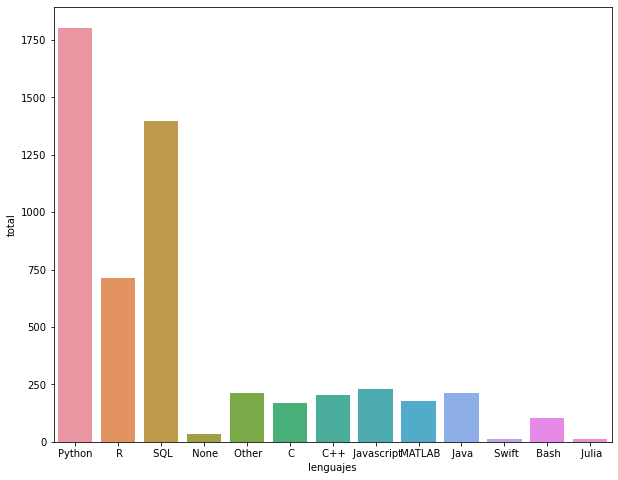

In [34]:
sns.barplot(x = df_conteo_lenguajes["lenguajes"], y = df_conteo_lenguajes["total"]);

<AxesSubplot:xlabel='2', ylabel='count'>

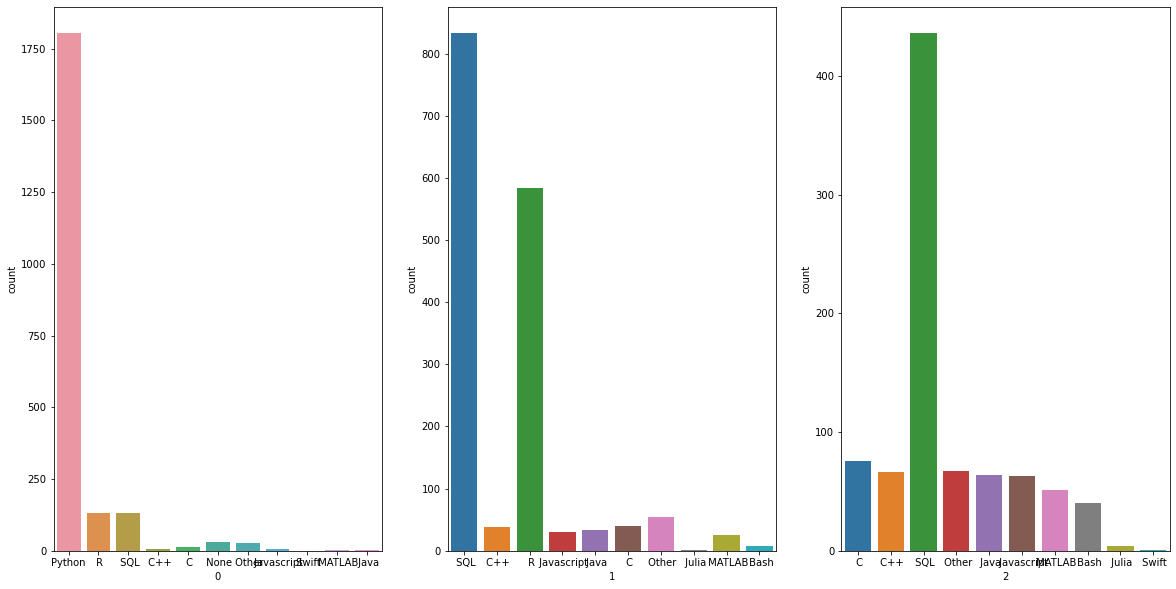

In [35]:
fig, axes = plt.subplots(nrows=1, ncols= 3, figsize=(20,10))

sns.countplot(x=df_lp[0], ax = axes[0])
sns.countplot(x=df_lp[1], ax = axes[1])
sns.countplot(x=df_lp[2], ax = axes[2])

Es generalizado el uso de más de un lenguaje de programación entre los DA.

De la muestra de la encuesta el lenguaje más usada con mucha diferencia respecto al resto es Python.

El segundo más nombrado es SQL, que también ocupa una posición destacada como tercer lenguaje en los que usan tres o más.

Como segundo lenguaje destaca R. 


In [36]:
df["lenguajes_recomendados"].value_counts()

Python        1587
SQL            261
R              199
C++             22
Java            18
Other           16
C               12
MATLAB          11
None            10
Javascript       9
Julia            8
Bash             4
Name: lenguajes_recomendados, dtype: int64

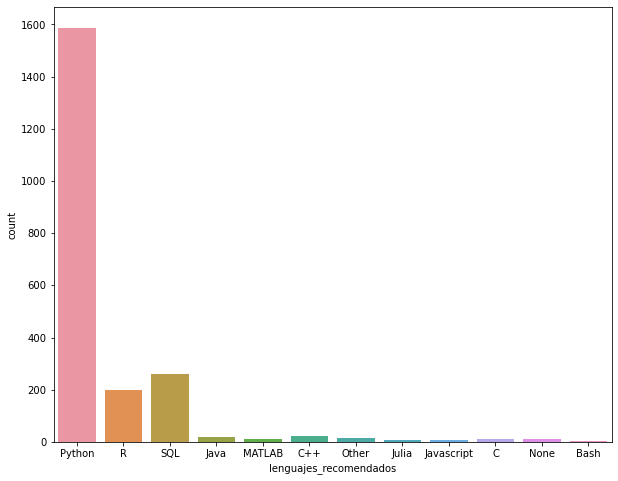

In [37]:
sns.countplot(x = df["lenguajes_recomendados"]);

In [38]:
(df["lenguajes_programacion"].str.split(",").apply(pd.Series)).describe(include="all").T

,count,unique,top,freq
0,2158,11,Python,1804
1,1648,10,SQL,833
2,868,10,SQL,436
3,341,9,Javascript,66
4,154,7,Java,41
5,64,6,Javascript,27
6,31,5,MATLAB,10
7,11,4,MATLAB,4
8,5,3,Swift,3
9,3,1,Bash,3


In [39]:
df.sample()

,edad,genero,pais,formacion,ocupacion,lenguajes_programacion,lenguajes_recomendados,IDE,plataforma_computacion,visualizacion,sector,tamaño_empresa,equipo,actividades,salario,productos_big_data,herramienta_data_analytics,notebooks,plataformas_nube,uso_plataformas,formacion_data,fuentes_online
7307,30-34,Man,Other,Master’s degree,Data Analyst,"Python, R, SQL",Python,"RStudio , Spyder,Jupyter Notebook",A laptop,"Matplotlib ,Seaborn ,Ggplot / ggplot2",Academics/Education,0-49 employees,1-2,Other,"1,000-1,999",NaN,"Basic statistical software (Microsoft Excel, Google Sheets, etc.)",None,None,NaN,"Kaggle Learn Courses, DataCamp",None


In [40]:
df_ide = pd.DataFrame(df['IDE'])

In [41]:
df_ide

,IDE
16,"Jupyter (JupyterLab, Jupyter Notebooks, etc) ,Jupyter Notebook"
32,RStudio
33,"Notepad++,Jupyter Notebook"
46,"Jupyter (JupyterLab, Jupyter Notebooks, etc) ,Visual Studio ,Visual Studio Code (VSCod..."
52,"RStudio ,Jupyter Notebook"
...,...
25954,Jupyter Notebook
25959,"Visual Studio ,Visual Studio Code (VSCode) ,Jupyter Notebook"
25965,"Jupyter (JupyterLab, Jupyter Notebooks, etc) ,Visual Studio Code (VSCode) ,PyCharm , S..."
25966,"PyCharm ,Jupyter Notebook"


In [42]:
df_ide.explode('IDE', ignore_index=True)

,IDE
0,"Jupyter (JupyterLab, Jupyter Notebooks, etc) ,Jupyter Notebook"
1,RStudio
2,"Notepad++,Jupyter Notebook"
3,"Jupyter (JupyterLab, Jupyter Notebooks, etc) ,Visual Studio ,Visual Studio Code (VSCod..."
4,"RStudio ,Jupyter Notebook"
...,...
2296,Jupyter Notebook
2297,"Visual Studio ,Visual Studio Code (VSCode) ,Jupyter Notebook"
2298,"Jupyter (JupyterLab, Jupyter Notebooks, etc) ,Visual Studio Code (VSCode) ,PyCharm , S..."
2299,"PyCharm ,Jupyter Notebook"


In [43]:
df_ide['IDE'].replace("Jupyter (JupyterLab, Jupyter Notebooks, etc)", "Jupyter", inplace= True)

In [44]:
df_ide

,IDE
16,"Jupyter (JupyterLab, Jupyter Notebooks, etc) ,Jupyter Notebook"
32,RStudio
33,"Notepad++,Jupyter Notebook"
46,"Jupyter (JupyterLab, Jupyter Notebooks, etc) ,Visual Studio ,Visual Studio Code (VSCod..."
52,"RStudio ,Jupyter Notebook"
...,...
25954,Jupyter Notebook
25959,"Visual Studio ,Visual Studio Code (VSCode) ,Jupyter Notebook"
25965,"Jupyter (JupyterLab, Jupyter Notebooks, etc) ,Visual Studio Code (VSCode) ,PyCharm , S..."
25966,"PyCharm ,Jupyter Notebook"


In [ ]:
df_ide = df_ide["IDE"].str.split(")").apply(pd.Series)

In [47]:
df_ide

,0,1,2
16,"Jupyter (JupyterLab, Jupyter Notebooks, etc",",Jupyter Notebook",NaN
32,RStudio,NaN,NaN
33,"Notepad++,Jupyter Notebook",NaN,NaN
46,"Jupyter (JupyterLab, Jupyter Notebooks, etc",",Visual Studio ,Visual Studio Code (VSCode",",PyCharm ,MATLAB ,Jupyter Notebook"
52,"RStudio ,Jupyter Notebook",NaN,NaN
...,...,...,...
25954,Jupyter Notebook,NaN,NaN
25959,"Visual Studio ,Visual Studio Code (VSCode",",Jupyter Notebook",NaN
25965,"Jupyter (JupyterLab, Jupyter Notebooks, etc",",Visual Studio Code (VSCode",",PyCharm , Sublime Text,Jupyter Notebook"
25966,"PyCharm ,Jupyter Notebook",NaN,NaN


In [53]:
df_ide_apply = df_ide.apply(lambda a: a.replace("Jupyter (JupyterLab, Jupyter Notebooks, etc", "Jupyter"))

In [57]:
df_ide_apply

,0,1,2
16,Jupyter,",Jupyter Notebook",NaN
32,RStudio,NaN,NaN
33,"Notepad++,Jupyter Notebook",NaN,NaN
46,Jupyter,",Visual Studio ,Visual Studio Code (VSCode",",PyCharm ,MATLAB ,Jupyter Notebook"
52,"RStudio ,Jupyter Notebook",NaN,NaN
...,...,...,...
25954,Jupyter Notebook,NaN,NaN
25959,"Visual Studio ,Visual Studio Code (VSCode",",Jupyter Notebook",NaN
25965,Jupyter,",Visual Studio Code (VSCode",",PyCharm , Sublime Text,Jupyter Notebook"
25966,"PyCharm ,Jupyter Notebook",NaN,NaN


In [ ]:
df_ide['IDE'].unique()

array(['Jupyter (JupyterLab, Jupyter Notebooks, etc) ,Jupyter Notebook',
       'RStudio ', ' Notepad++,Jupyter Notebook',
       'Jupyter (JupyterLab, Jupyter Notebooks, etc) ,Visual Studio ,Visual Studio Code (VSCode) ,PyCharm ,MATLAB ,Jupyter Notebook',
       'RStudio ,Jupyter Notebook', 'PyCharm , Spyder', ' None',
       'Jupyter Notebook, Other', 'Visual Studio ,Jupyter Notebook',
       'Jupyter Notebook',
       'Jupyter (JupyterLab, Jupyter Notebooks, etc) ,Visual Studio Code (VSCode) ,Jupyter Notebook',
       'Jupyter (JupyterLab, Jupyter Notebooks, etc) ,Visual Studio ,PyCharm , Notepad++,Jupyter Notebook',
       'Jupyter (JupyterLab, Jupyter Notebooks, etc) ,RStudio , Spyder',
       ' Spyder',
       'Jupyter (JupyterLab, Jupyter Notebooks, etc) ,Visual Studio Code (VSCode) ,PyCharm ,Jupyter Notebook',
       'Visual Studio ', 'PyCharm ,Jupyter Notebook',
       'Jupyter (JupyterLab, Jupyter Notebooks, etc) ,RStudio ,PyCharm , Spyder, Sublime Text,Jupyter Notebook',
   

In [ ]:
dicc = {'Jupyter (JupyterLab, Jupyter Notebooks, etc)' : }

In [ ]:
break

SyntaxError: 'break' outside loop (668683560.py, line 1)

In [ ]:
df_ide = df["IDE"].str.split(",").apply(pd.Series)

In [ ]:
df_ide

,0,1,2,3,4,5,6,7,8,9,10,11,12
16,Jupyter (JupyterLab,Jupyter Notebooks,etc),Jupyter Notebook,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,RStudio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,Notepad++,Jupyter Notebook,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,Jupyter (JupyterLab,Jupyter Notebooks,etc),Visual Studio,Visual Studio Code (VSCode),PyCharm,MATLAB,Jupyter Notebook,NaN,NaN,NaN,NaN,NaN
52,RStudio,Jupyter Notebook,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25954,Jupyter Notebook,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25959,Visual Studio,Visual Studio Code (VSCode),Jupyter Notebook,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25965,Jupyter (JupyterLab,Jupyter Notebooks,etc),Visual Studio Code (VSCode),PyCharm,Sublime Text,Jupyter Notebook,NaN,NaN,NaN,NaN,NaN,NaN
25966,PyCharm,Jupyter Notebook,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
def hacer_replace(dataframe):

    dataframe.replace("\(.*\)", "", regex = True, inplace= True)
    dataframe.replace("Jupyter Notebook'", "Jupyter", inplace= True)

    return dataframe

In [ ]:
hacer_replace(df_ide)

,0,1,2,3,4,5,6,7,8,9,10,11,12
16,Jupyter (JupyterLab,Jupyter Notebooks,etc),Jupyter Notebook,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,RStudio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,Notepad++,Jupyter Notebook,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,Jupyter (JupyterLab,Jupyter Notebooks,etc),Visual Studio,Visual Studio Code,PyCharm,MATLAB,Jupyter Notebook,NaN,NaN,NaN,NaN,NaN
52,RStudio,Jupyter Notebook,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25954,Jupyter Notebook,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25959,Visual Studio,Visual Studio Code,Jupyter Notebook,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25965,Jupyter (JupyterLab,Jupyter Notebooks,etc),Visual Studio Code,PyCharm,Sublime Text,Jupyter Notebook,NaN,NaN,NaN,NaN,NaN,NaN
25966,PyCharm,Jupyter Notebook,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_ide.applymap(lambda a : a.replace("Jupyter Notebook'", "Jupyter"), na_action='ignore')

,0,1,2,3,4,5,6,7,8,9,10,11,12
16,Jupyter (JupyterLab,Jupyter Notebooks,etc),Jupyter Notebook,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,RStudio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,Notepad++,Jupyter Notebook,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,Jupyter (JupyterLab,Jupyter Notebooks,etc),Visual Studio,Visual Studio Code,PyCharm,MATLAB,Jupyter Notebook,NaN,NaN,NaN,NaN,NaN
52,RStudio,Jupyter Notebook,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25954,Jupyter Notebook,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25959,Visual Studio,Visual Studio Code,Jupyter Notebook,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25965,Jupyter (JupyterLab,Jupyter Notebooks,etc),Visual Studio Code,PyCharm,Sublime Text,Jupyter Notebook,NaN,NaN,NaN,NaN,NaN,NaN
25966,PyCharm,Jupyter Notebook,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:

df_ide.explode(0, ignore_index=True)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,Jupyter (JupyterLab,Jupyter Notebooks,etc),Jupyter Notebook,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,RStudio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Notepad++,Jupyter Notebook,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Jupyter (JupyterLab,Jupyter Notebooks,etc),Visual Studio,Visual Studio Code,PyCharm,MATLAB,Jupyter Notebook,NaN,NaN,NaN,NaN,NaN
4,RStudio,Jupyter Notebook,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2296,Jupyter Notebook,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2297,Visual Studio,Visual Studio Code,Jupyter Notebook,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2298,Jupyter (JupyterLab,Jupyter Notebooks,etc),Visual Studio Code,PyCharm,Sublime Text,Jupyter Notebook,NaN,NaN,NaN,NaN,NaN,NaN
2299,PyCharm,Jupyter Notebook,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_ide = df["IDE"].replace("\(.*\)", "", regex = True)
df_ide = df["IDE"].replace("Jupyter Notebook'", "Jupyter")
df_ide = df["IDE"].str.split(",").apply(pd.Series)